In [1]:
import matplotlib.pyplot as plt
import numpy as np


from complex_network.components.link import Link
from complex_network.components.node import Node
from complex_network.networks.network import Network
from complex_network.networks import network_factory
from complex_network.networks.network_factory import generate_network
from complex_network.networks.network_spec import NetworkSpec
from complex_network.interferometry.olcr import OLCR

In [2]:
spec = NetworkSpec(
                num_external_nodes=1,
                num_internal_nodes=8,
                network_type="delaunay",
                network_shape="slab",
                network_size=(200e-6, 200e-6),
                external_offset=10e-6,
                random_seed=10,
                fully_connected=True,
                node_S_mat_type='neumann'
            )
network = generate_network(spec)

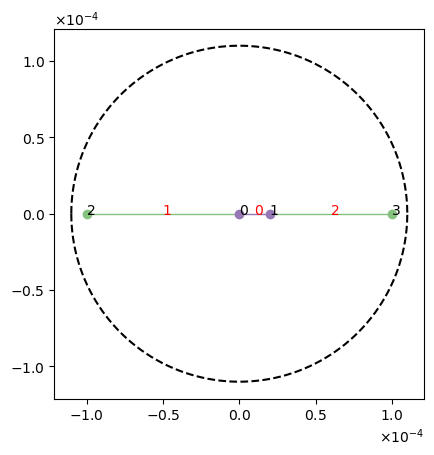

In [3]:

node_dict = {}
link_dict = {}

node_dict[0] = Node(0,'internal',[0,0])
node_dict[1] = Node(1,'internal',[20e-6,0])
node_dict[2] = Node(2,'external',[-100e-6,0])
node_dict[3] = Node(3, 'external', [100e-6,0])

link_dict[0] = Link(0, 'internal', (0,1))
link_dict[1] = Link(1, 'external', (0,2))
link_dict[2] = Link(2, 'external', (1,3))


spec = NetworkSpec(
    network_type="custom",
    random_seed=10,
    network_shape=None,
    node_dict=node_dict,
    link_dict=link_dict,
    network_size=110e-6,
    node_S_mat_type='neumann'
)

network = network_factory.generate_network(spec)

network.draw(
    equal_aspect=True,
    highlight_links=[],
    show_external_indices=False,
    show_indices=True,
    highlight_nodes=[],
    draw_boundary=spec.network_size
)

In [153]:
r = 0.1
t = 0.9
S = np.array([[np.sqrt(r), np.sqrt(t)], [np.sqrt(t), -np.sqrt(r)]])
network.update_node_scattering_matrix(0, node_S_mat_type='custom', node_S_mat_params={'S_mat': S})

In [154]:
r = 0.2
t = 0.8
S = np.array([[np.sqrt(r), np.sqrt(t)], [np.sqrt(t), -np.sqrt(r)]])
network.update_node_scattering_matrix(1, node_S_mat_type='custom', node_S_mat_params={'S_mat': S})

In [155]:
lambda_val = 1000e-9
k_0 = 2*np.pi / lambda_val
network.get_node(0).get_S(k_0)

array([[ 0.31622777,  0.9486833 ],
       [ 0.9486833 , -0.31622777]])

In [162]:
lambda_val = 1000e-9
k_0 = 2*np.pi / lambda_val
network.get_node(1).get_S(k_0)

array([[ 0.4472136 ,  0.89442719],
       [ 0.89442719, -0.4472136 ]])

In [163]:
# Lets do an OLCR experiment on this node and observe their heights
olcr = OLCR(network=network,
            input_node=0,
            measurement_node=0,
            central_wavelength=1000e-9,
            bandwidth=400e-9,
            num_wavelength_sample=int(1e5),
            optical_path_length=[200e-6,600e-6],
            num_optical_path_length_sample=int(5e4),
            use_multi_proc=True)

In [164]:
interferogram = olcr.get_interferogram()

Calculating interferogram (FT Method) parallelly


In [167]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4),dpi=2000)
plt.plot(olcr.opls, interferogram-np.mean(interferogram),lw=0.5)
plt.axhline(0.3999, color='r', ls='--',lw=0.5)
plt.axhline(0.2792, color='g', ls='--',lw=0.5)
plt.show()

In [168]:
0.3999/0.2792

1.4323065902578795

In [169]:
0.162/0.1

1.6199999999999999

In [159]:
# Lets do an OLCR experiment on this node and observe their heights
olcr = OLCR(network=network,
            input_node=0,
            measurement_node=0,
            central_wavelength=1000e-9,
            bandwidth=500e-9,
            num_wavelength_sample=int(1e5),
            optical_path_length=[200e-6,400e-6],
            num_optical_path_length_sample=int(5e4),
            use_multi_proc=True)

In [160]:
interferogram = olcr.get_interferogram()

Calculating interferogram (FT Method) parallelly


In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4),dpi=2000)
plt.plot(olcr.opls, interferogram-np.mean(interferogram),lw=0.5)
plt.axhline(0.3992, color='r', ls='--',lw=0.5)
plt.axhline(0.2592, color='g', ls='--',lw=0.5)
plt.show()